<a href="https://colab.research.google.com/github/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Projeto_1_Processamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 - Processamento de dados



Alunos:

Afonso Henrique Piacentini Garcia, Nº USP: 9795272

Breno Lívio Silva de Almeida, Nº USP: 10276675

Vitor Henrique Gratiere Torres, Nº USP: 10284952




---



## Descrição

Essa parte do projeto da disciplina consiste no processamento de um conjunto de dados, um dataset. O conjunto de dados escolhido foi o de [Pokémons](https://www.pokemon.com/br/), do vídeo-game homônimo. As criaturas, chamadas de Pokémons, são representadas no jogo em questão por um item chamado [Pokédex](https://www.pokemon.com/br/pokedex/), que contém o nome e outras estatísticas relevantes aos jogos, como pontos de vida, ataque e etc. Os dados referentes à Pokédex foram retirados do site [Pokémon Database](https://pokemondb.net/pokedex/all).

### [pokemon.csv](https://github.com/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/crawler/pokemon.csv)



*   attack: stat que indica o poder de ataque fisico base do pokemon
*   cod: O número do pokemon na pokedex
*   defense: stat que indica a defesa fisica base do pokemon
*   hp: stat que indica a vida base do pokemon
*   img: link para a imagem do pokemon 
*   name: O nome do Pokemon
*   spatk: stat que indica o poder de ataque especial do pokemon
*   spdef: stat que indica o poder de defesa especial do pokemon
*   speed: stat que indica a velocidade base do pokemon
*   total: soma total dos stats do pokemon
*   type1: tipo do pokemon
*   type2: segundo tipo do pokemon, caso possua




### Gerações dos Pokémons

1 ª geração: Bulbasaur 001 - Mew 151

2 ª geração: Chikorita 152 - Celebi 251

3 ª geração: Treecko 252 - Deoxys 386

4 ª geração: Turtwig 387 - Arceus 493

5 ª geração: Victini 494 - Genesect 649

6 ª geração: Chespin 650 - Volcanion 721

7 ª geração: Rowlet 722 - Melmetal 809

8 ª geração: Grookey 810 - Zarude 893

## Desenvolvimento

Leitura do CSV como data frame do Pandas

In [ ]:
import pandas as pd

dfPokemon = pd.read_csv("https://raw.githubusercontent.com/brenoslivio/SCC0652_Computational_Visualization/master/notebooks/crawler/pokemon.csv")

dfPokemon

,attack,cod,defense,hp,img,name,spatk,spdef,speed,subtitle,total,type1,type2
0,49,1,49,45,https://img.pokemondb.net/sprites/sword-shield...,Bulbasaur,65,65,45,NaN,318,Grass,Poison
1,62,2,63,60,https://img.pokemondb.net/sprites/sword-shield...,Ivysaur,80,80,60,NaN,405,Grass,Poison
2,82,3,83,80,https://img.pokemondb.net/sprites/sword-shield...,Venusaur,100,100,80,NaN,525,Grass,Poison
3,100,3,123,80,https://img.pokemondb.net/sprites/sword-shield...,Venusaur,122,120,80,Mega Venusaur,625,Grass,Poison
4,52,4,43,39,https://img.pokemondb.net/sprites/sword-shield...,Charmander,60,50,65,NaN,309,Fire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,115,890,250,255,https://img.pokemondb.net/sprites/sword-shield...,Eternatus,125,250,130,Eternamax,1125,Poison,Dragon
1030,90,891,60,60,https://img.pokemondb.net/s.png,Kubfu,53,50,72,NaN,385,Fighting,NaN
1031,130,892,100,100,https://img.pokemondb.net/s.png,Urshifu,63,60,97,Single Strike Style,550,Fighting,Dark
1032,130,892,100,100,https://img.pokemondb.net/s.png,Urshifu,63,60,97,Rapid Strike Style,550,Fighting,Water


Da forma como o dataset foi coletado, precisamos fazer vários tipos de tratamento. O mais interessante primeiramente seria o de reposicionar as colunas.

In [ ]:
dfPokemon = dfPokemon[['name', 'cod', 'subtitle','type1','type2', 'total', 'hp', 'attack', 'defense', 'spatk', 'spdef', 'speed', 'img']]

dfPokemon

,name,cod,subtitle,type1,type2,total,hp,attack,defense,spatk,spdef,speed,img
0,Bulbasaur,1,NaN,Grass,Poison,318,45,49,49,65,65,45,https://img.pokemondb.net/sprites/sword-shield...
1,Ivysaur,2,NaN,Grass,Poison,405,60,62,63,80,80,60,https://img.pokemondb.net/sprites/sword-shield...
2,Venusaur,3,NaN,Grass,Poison,525,80,82,83,100,100,80,https://img.pokemondb.net/sprites/sword-shield...
3,Venusaur,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,https://img.pokemondb.net/sprites/sword-shield...
4,Charmander,4,NaN,Fire,NaN,309,39,52,43,60,50,65,https://img.pokemondb.net/sprites/sword-shield...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,Eternatus,890,Eternamax,Poison,Dragon,1125,255,115,250,125,250,130,https://img.pokemondb.net/sprites/sword-shield...
1030,Kubfu,891,NaN,Fighting,NaN,385,60,90,60,53,50,72,https://img.pokemondb.net/s.png
1031,Urshifu,892,Single Strike Style,Fighting,Dark,550,100,130,100,63,60,97,https://img.pokemondb.net/s.png
1032,Urshifu,892,Rapid Strike Style,Fighting,Water,550,100,130,100,63,60,97,https://img.pokemondb.net/s.png


Para fazer manipulações e análises mais interessantes no decorrer do projeto, iremos separar os Pokémons em gerações, que já foi comentado na descrição do projeto. Vamos achar os index dos últimos pokémons do final de cada geração.

In [ ]:
g1 = dfPokemon.loc[dfPokemon['name']=='Mew'].tail(1).index.item()
g2 = dfPokemon.loc[dfPokemon['name']=='Celebi'].tail(1).index.item()
g3 = dfPokemon.loc[dfPokemon['name']=='Deoxys'].tail(1).index.item()
g4 = dfPokemon.loc[dfPokemon['name']=='Arceus'].tail(1).index.item()
g5 = dfPokemon.loc[dfPokemon['name']=='Genesect'].tail(1).index.item()
g6 = dfPokemon.loc[dfPokemon['name']=='Volcanion'].tail(1).index.item()
g7 = dfPokemon.loc[dfPokemon['name']=='Melmetal'].tail(1).index.item()
g8 = dfPokemon.loc[dfPokemon['name']=='Zarude'].tail(1).index.item()

Em seguida, vamos criar uma coluna para indicar a geração de cada um dos pokémons do dataset. Começamos alocando valores NaN para ela.

In [ ]:
import numpy as np

dfPokemon.insert(2, "generation", np.nan)

dfPokemon

,name,cod,generation,subtitle,type1,type2,total,hp,attack,defense,spatk,spdef,speed,img
0,Bulbasaur,1,NaN,NaN,Grass,Poison,318,45,49,49,65,65,45,https://img.pokemondb.net/sprites/sword-shield...
1,Ivysaur,2,NaN,NaN,Grass,Poison,405,60,62,63,80,80,60,https://img.pokemondb.net/sprites/sword-shield...
2,Venusaur,3,NaN,NaN,Grass,Poison,525,80,82,83,100,100,80,https://img.pokemondb.net/sprites/sword-shield...
3,Venusaur,3,NaN,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,https://img.pokemondb.net/sprites/sword-shield...
4,Charmander,4,NaN,NaN,Fire,NaN,309,39,52,43,60,50,65,https://img.pokemondb.net/sprites/sword-shield...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,Eternatus,890,NaN,Eternamax,Poison,Dragon,1125,255,115,250,125,250,130,https://img.pokemondb.net/sprites/sword-shield...
1030,Kubfu,891,NaN,NaN,Fighting,NaN,385,60,90,60,53,50,72,https://img.pokemondb.net/s.png
1031,Urshifu,892,NaN,Single Strike Style,Fighting,Dark,550,100,130,100,63,60,97,https://img.pokemondb.net/s.png
1032,Urshifu,892,NaN,Rapid Strike Style,Fighting,Water,550,100,130,100,63,60,97,https://img.pokemondb.net/s.png


Em seguida, com os index de até qual pokémon faz parte de uma geração, alocamos as gerações para cada pokémon

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

dfPokemon["generation"][0:(g1+1)] = "1st"
dfPokemon["generation"][(g1+1):(g2+1)] = "2nd"
dfPokemon["generation"][(g2+1):(g3+1)] = "3rd"
dfPokemon["generation"][(g3+1):(g4+1)] = "4th"
dfPokemon["generation"][(g4+1):(g5+1)] = "5th"
dfPokemon["generation"][(g5+1):(g6+1)] = "6th"
dfPokemon["generation"][(g6+1):(g7+1)] = "7th"
dfPokemon["generation"][(g7+1):(g8+1)] = "8th"

dfPokemon

,name,cod,generation,subtitle,type1,type2,total,hp,attack,defense,spatk,spdef,speed,img
0,Bulbasaur,1,1st,NaN,Grass,Poison,318,45,49,49,65,65,45,https://img.pokemondb.net/sprites/sword-shield...
1,Ivysaur,2,1st,NaN,Grass,Poison,405,60,62,63,80,80,60,https://img.pokemondb.net/sprites/sword-shield...
2,Venusaur,3,1st,NaN,Grass,Poison,525,80,82,83,100,100,80,https://img.pokemondb.net/sprites/sword-shield...
3,Venusaur,3,1st,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,https://img.pokemondb.net/sprites/sword-shield...
4,Charmander,4,1st,NaN,Fire,NaN,309,39,52,43,60,50,65,https://img.pokemondb.net/sprites/sword-shield...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,Eternatus,890,8th,Eternamax,Poison,Dragon,1125,255,115,250,125,250,130,https://img.pokemondb.net/sprites/sword-shield...
1030,Kubfu,891,8th,NaN,Fighting,NaN,385,60,90,60,53,50,72,https://img.pokemondb.net/s.png
1031,Urshifu,892,8th,Single Strike Style,Fighting,Dark,550,100,130,100,63,60,97,https://img.pokemondb.net/s.png
1032,Urshifu,892,8th,Rapid Strike Style,Fighting,Water,550,100,130,100,63,60,97,https://img.pokemondb.net/s.png


Arrumamos a coluna 'cod', que é o código de cada Pokémon na Pokédex, adicionando zeros à esquerda/leading zeros.

In [ ]:
newCod = np.nan

for id in dfPokemon['cod']:
  dd.a[dd.a == 1] = 100
  dfPokemon.cod[dfPokemon.]
  np.append(newCod, "{:03d}".format(id))

newCod

TypeError: ignored

Achando outliers

In [ ]:
data = dfPokemon

Q1 = data["total"].quantile(0.25) # primeiro quartil
Q3 = data["total"].quantile(0.75) # segundo quartil
IQR = Q3 - Q1 # distância interquartil

out = ((data["total"] < (Q1 - 1.25 * IQR)) | (data["total"] > (Q3 + 1.25 * IQR))) # vetor contendo os valores booleanos
# para cada uma das observações indicando se ele é um outlier (True) ou não (False)

# vetor contendo os outliers para o conjunto de dados 
Iris_out = data[list(out)]

Iris_out

,name,cod,generation,subtitle,type1,type2,total,hp,attack,defense,spatk,spdef,speed,img
191,Mewtwo,150,1st,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,https://img.pokemondb.net/sprites/sword-shield...
192,Mewtwo,150,1st,Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,https://img.pokemondb.net/sprites/sword-shield...
456,Kyogre,382,3rd,Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,https://img.pokemondb.net/sprites/sword-shield...
458,Groudon,383,3rd,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,https://img.pokemondb.net/sprites/sword-shield...
460,Rayquaza,384,3rd,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,https://img.pokemondb.net/sprites/sword-shield...
932,Necrozma,800,7th,Ultra Necrozma,Psychic,Dragon,754,97,167,97,167,97,129,https://img.pokemondb.net/sprites/sword-shield...
1029,Eternatus,890,8th,Eternamax,Poison,Dragon,1125,255,115,250,125,250,130,https://img.pokemondb.net/sprites/sword-shield...


# Para a parte 2

generation
1st    AxesSubplot(0.125,0.125;0.775x0.755)
2nd    AxesSubplot(0.125,0.125;0.775x0.755)
3rd    AxesSubplot(0.125,0.125;0.775x0.755)
4th    AxesSubplot(0.125,0.125;0.775x0.755)
5th    AxesSubplot(0.125,0.125;0.775x0.755)
6th    AxesSubplot(0.125,0.125;0.775x0.755)
7th    AxesSubplot(0.125,0.125;0.775x0.755)
8th    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total, dtype: object

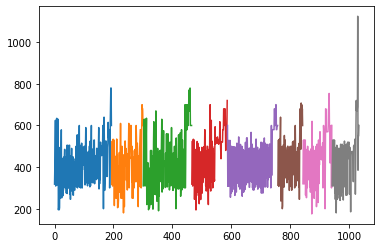

In [ ]:
dfPokemon.groupby("generation")["total"].plot()

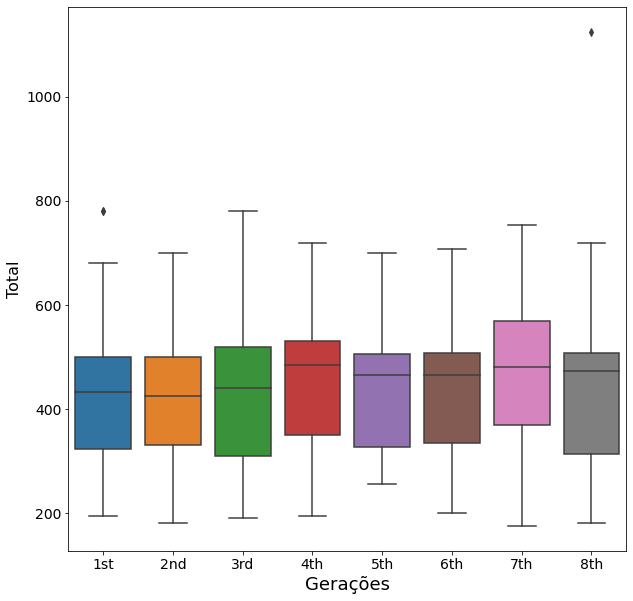

In [ ]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = "generation", y = "total", data = dfPokemon)
plt.xlabel('Gerações', fontsize = 18)
plt.ylabel('Total', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show(True)